# **Algerian Forest Fires Analysis 🔥🌲**


**Additional Information**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

**Additional Variable Information**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
1. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90 
3. Ws :Wind speed in km/h: 6 to 29 
4. Rain: total day in mm: 0 to 16.8
FWI Components  
1. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
2. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
3. Drought Code (DC) index from the FWI system:  7 to 220.4
4. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
5.  Buildup Index (BUI) index from the FWI system: 1.1 to 68
6.  Fire Weather Index (FWI) Index: 0 to 31.1
7.  Classes: two classes




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_main = pd.read_csv(r"Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df = df_main.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
# is there any record which is completely null

df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [7]:
df['Region'] = df['Region'].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [11]:
df.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [12]:
df = df.drop(122).reset_index(drop=True)

In [13]:
# fix spaces and capitalization in column name 

df.columns = df.columns.str.strip().str.lower()

In [14]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [15]:
#changing data types of features

df.sample(10)

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
31,02,07,2012,27,75,19,1.2,55.7,2.4,8.3,0.8,2.8,0.3,not fire,0
17,18,06,2012,31,78,14,0.3,56.9,1.9,8,0.7,2.4,0.2,not fire,0
177,27,07,2012,29,87,18,0,80,11.8,28.3,2.8,11.8,3.2,not fire,1
104,13,09,2012,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,not fire,0
193,12,08,2012,39,21,17,0.4,93,18.4,41.5,15.5,18.4,18.8,fire,1
21,22,06,2012,31,67,17,0.1,79.1,7,39.5,2.4,9.7,2.3,not fire,0
12,13,06,2012,27,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire,0
85,25,08,2012,35,60,15,0,88.9,43.9,181.3,8.2,54.7,20.3,fire,0
139,18,06,2012,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,not fire,1
106,15,09,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,not fire,0


In [16]:
df[['day', 'month', 'year', 'temperature', 'rh', 'ws']] = df[['day', 'month', 'year', 'temperature', 'rh', 'ws']].astype(int)

In [17]:
df[['rain', 'ffmc','dmc', 'dc', 'isi', 'bui', 'fwi']] =df[['rain', 'ffmc','dmc', 'dc', 'isi', 'bui', 'fwi']].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [19]:
# save the clean dataset into another dataset File 
df.to_csv('Algerian_Data.csv',index=False)

# EDA

In [20]:
# deleting unnecessary features to predict fwi

df_cleaned = df.copy()
df = df.drop(['day', 'month', 'year'],axis=1)

In [21]:
df.sample(5)

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
204,36,43,16,0.0,91.2,46.1,137.7,11.5,50.2,24.5,fire,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,not fire,0
216,30,66,15,0.2,73.5,4.1,26.6,1.5,6.0,0.7,not fire,1
126,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
71,35,63,13,0.0,88.9,21.7,77.0,7.1,25.5,12.1,fire,0


In [22]:
df['classes'].value_counts()

classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [23]:
# encoding of categories (classes into 0 or 1)

# Clean the column before mapping
df['classes'] = df['classes'].str.strip().str.lower()

# Map to 1 and 0
df['classes'] = df['classes'].map({
    'fire': 1,
    'not fire': 0
})

df.head()


,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

# Visualization

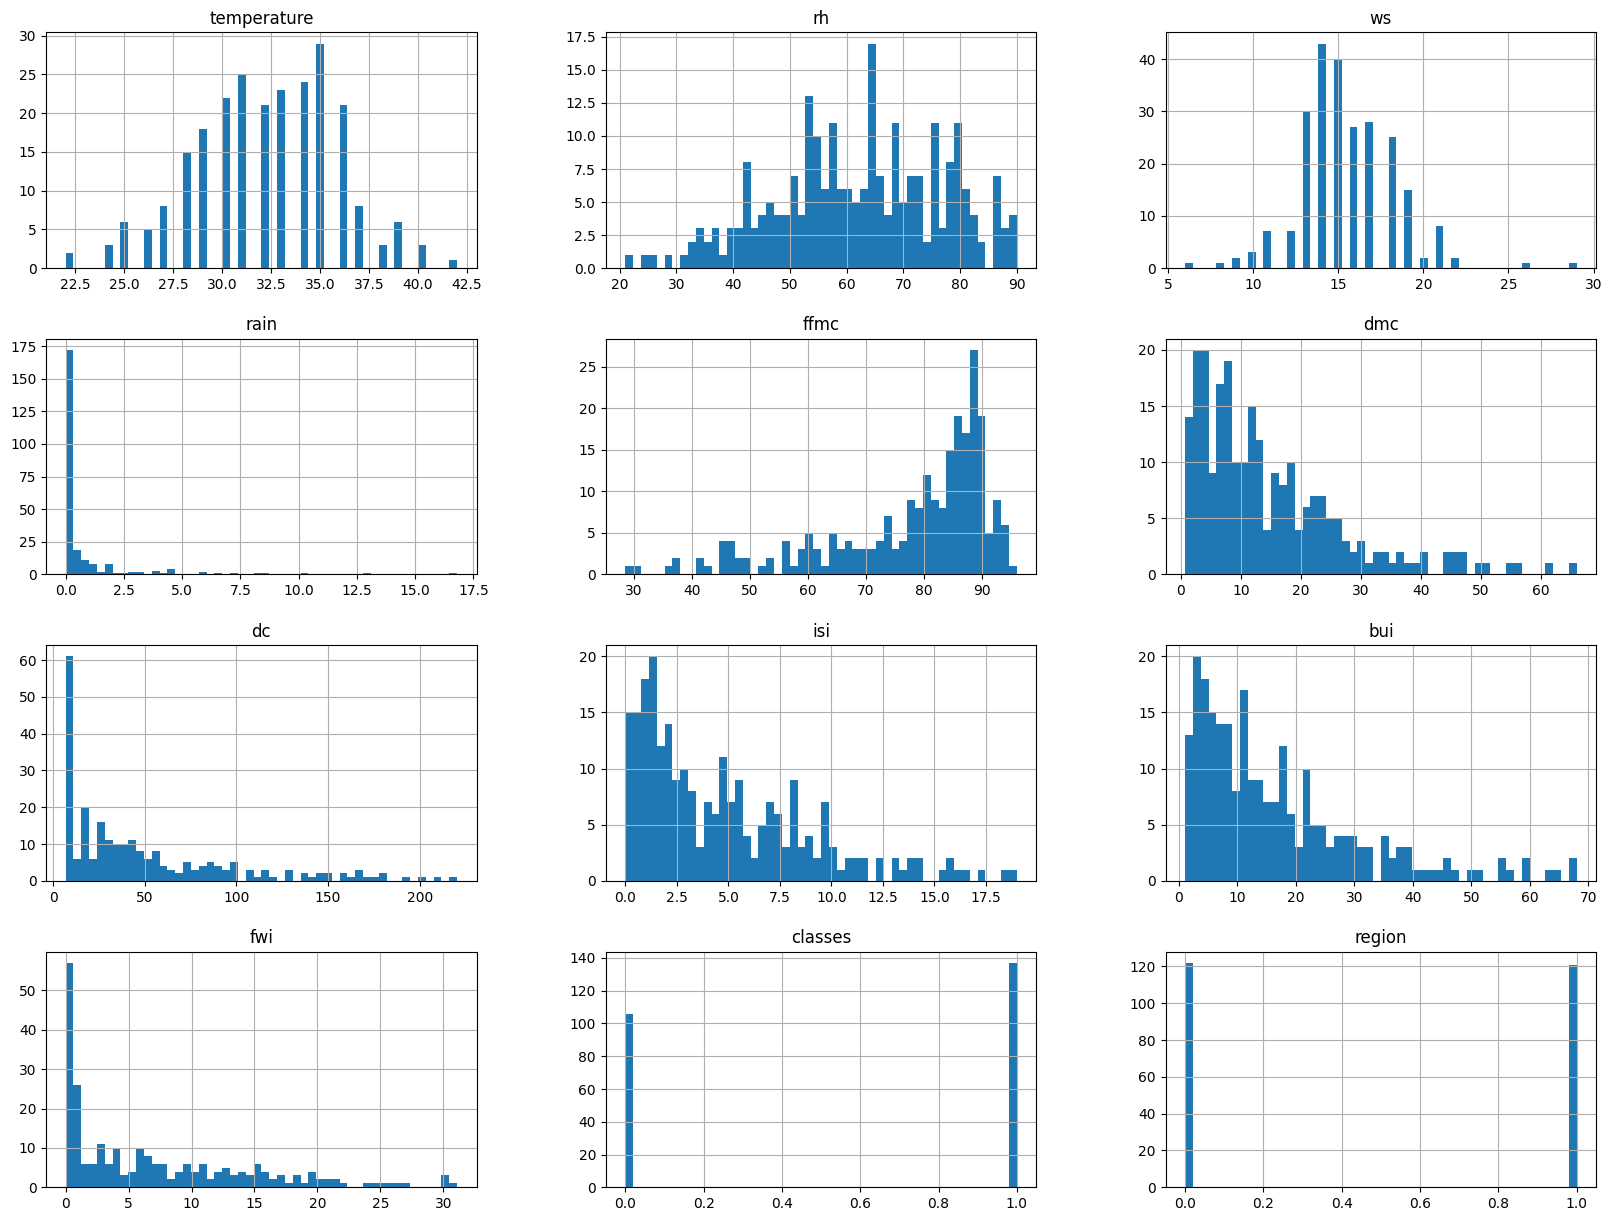

In [25]:

df.hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
df.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

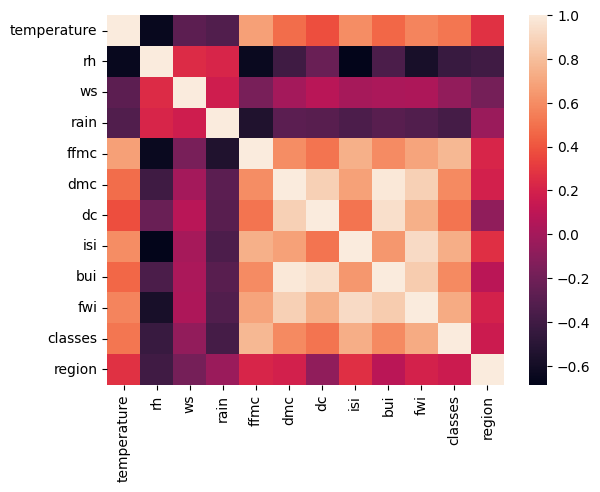

In [34]:
sns.heatmap(df.corr())

<Axes: >

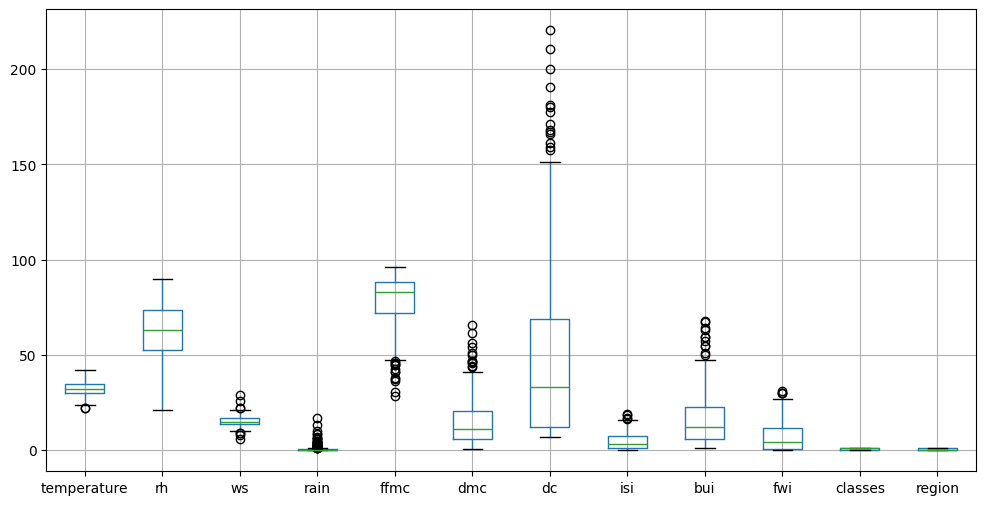

In [38]:
plt.figure(figsize=(12,6))
df.boxplot()